# Diabetes Health Indicators - Data Analyse

**Dataset:** CDC BRFSS 2015 (Behavioral Risk Factor Surveillance System)

Dit notebook:
1. Kloont de repository en installeert dependencies
2. Downloadt de dataset van Kaggle
3. Bekijkt de onderzoeksvragen
4. Laadt, schoont en splitst de data per onderzoeksvraag
5. Beschrijft de data met statistieken, boxplots en histogrammen
6. Visualiseert de data met grafieken en correlatiematrices

## Stap 1: Repository klonen en dependencies installeren

In [ ]:
!git clone https://github.com/Pablo-Atanes/Minor-bigdata.git
%cd Minor-bigdata
!pip install -q -r requirements.txt

## Stap 2: Dataset downloaden van Kaggle

De `data/` map staat in `.gitignore` en zit dus niet in de repository.
We downloaden de dataset via `kagglehub`.

**Let op:** Bij de eerste keer wordt gevraagd om je Kaggle credentials.
Deze kun je aanmaken op https://www.kaggle.com/settings > API > Create New Token.

In [ ]:
!pip install -q kagglehub

import kagglehub
import shutil
import os

# Dataset downloaden van Kaggle
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
print(f"Dataset gedownload naar: {path}")

# CSV bestanden kopieren naar data/ map
os.makedirs("data", exist_ok=True)
for f in os.listdir(path):
    if f.endswith(".csv"):
        shutil.copy(os.path.join(path, f), os.path.join("data", f))
        print(f"Gekopieerd: {f}")

print("\nBestanden in data/:")
!ls data/

## Stap 3: Onderzoeksvragen bekijken

We tonen de inhoud van `research_questions.md` om te bevestigen welke variabelen we nodig hebben.

In [ ]:
!cat research_questions.md

## Stap 4: Data laden, opschonen en opsplitsen

We gebruiken `data_cleaner.py` om de data te laden en op te schonen:
1. Dubbele rijen verwijderen
2. Rijen met ontbrekende waarden verwijderen
3. Datatypen converteren naar integers
4. Waardebereiken valideren (binaire kolommen 0/1, ordinale kolommen binnen bereik)
5. BMI uitschieters filteren (12-98)

Daarna splitsen we de data op per onderzoeksvraag:

| Vraag | Onderwerp | Kolommen |
|-------|-----------|----------|
| Q1 | Fruit Consumptie & Diabetes | `Diabetes_binary`, `Fruits` |
| Q2 | Lifestyle Patronen (Apriori) | `Diabetes_binary`, `Smoker`, `PhysActivity`, `Fruits`, `Veggies`, `HvyAlcoholConsump` |
| Q3 | Socio-economische Status | `Diabetes_binary`, `Income`, `Education` |
| Q4 | Cumulatief Lifestyle Effect | `Diabetes_binary`, `Smoker`, `PhysActivity`, `Fruits`, `HvyAlcoholConsump`, `Unhealthy_Lifestyle_Score` |
| Q5 | Cholesterol + Bloeddruk | `Diabetes_binary`, `HighBP`, `HighChol`, `HighBP_x_HighChol` |

In [ ]:
from data_procesing.data_cleaner import load_data, clean_data, get_data_for_questions, save_questions_to_json

# Data laden
df = load_data()
print(f"Ruwe data: {df.shape[0]} rijen, {df.shape[1]} kolommen")
print(f"Kolommen: {df.columns.tolist()}\n")

# Data opschonen
df = clean_data(df)

# Opsplitsen per onderzoeksvraag en opslaan
questions = get_data_for_questions(df)
save_questions_to_json(questions)

---
## Stap 5: Beschrijf de data met statistieken

Voor elke onderzoeksvraag berekenen we per kolom:
- **Aantal** — het totaal aantal waarden
- **Gemiddelde** — het rekenkundig gemiddelde
- **Mediaan** — de middelste waarde
- **Modus** — de meest voorkomende waarde
- **Standaardafwijking** — de spreiding rond het gemiddelde
- **Min / Max** — de kleinste en grootste waarde
- **Scheefheid** — hoe scheef de verdeling is (0 = symmetrisch)
- **Kurtosis** — hoe "puntig" of "vlak" de verdeling is

In [ ]:
from data_procesing.data_description import describe_all, plot_boxplots, plot_histograms

# Beschrijvende statistieken voor alle onderzoeksvragen
all_stats = describe_all(questions)

### Boxplots per onderzoeksvraag

Boxplots tonen de spreiding, mediaan en uitschieters per variabele.
De lijn in het midden van de box is de **mediaan**, de randen van de box zijn het **eerste en derde kwartiel** (Q1 en Q3).
Punten buiten de "whiskers" zijn mogelijke **uitschieters**.

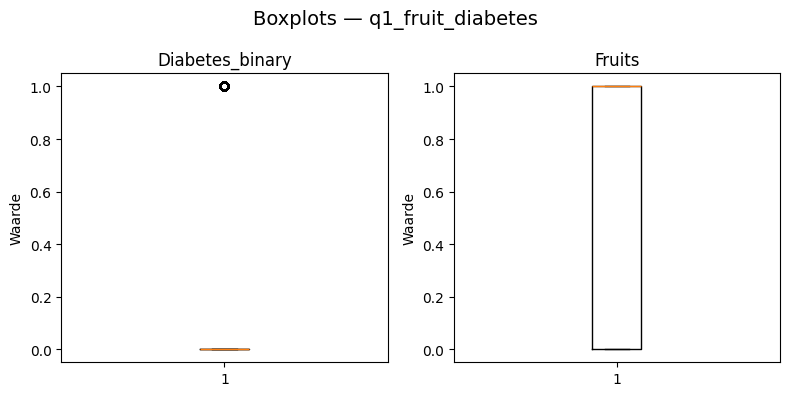

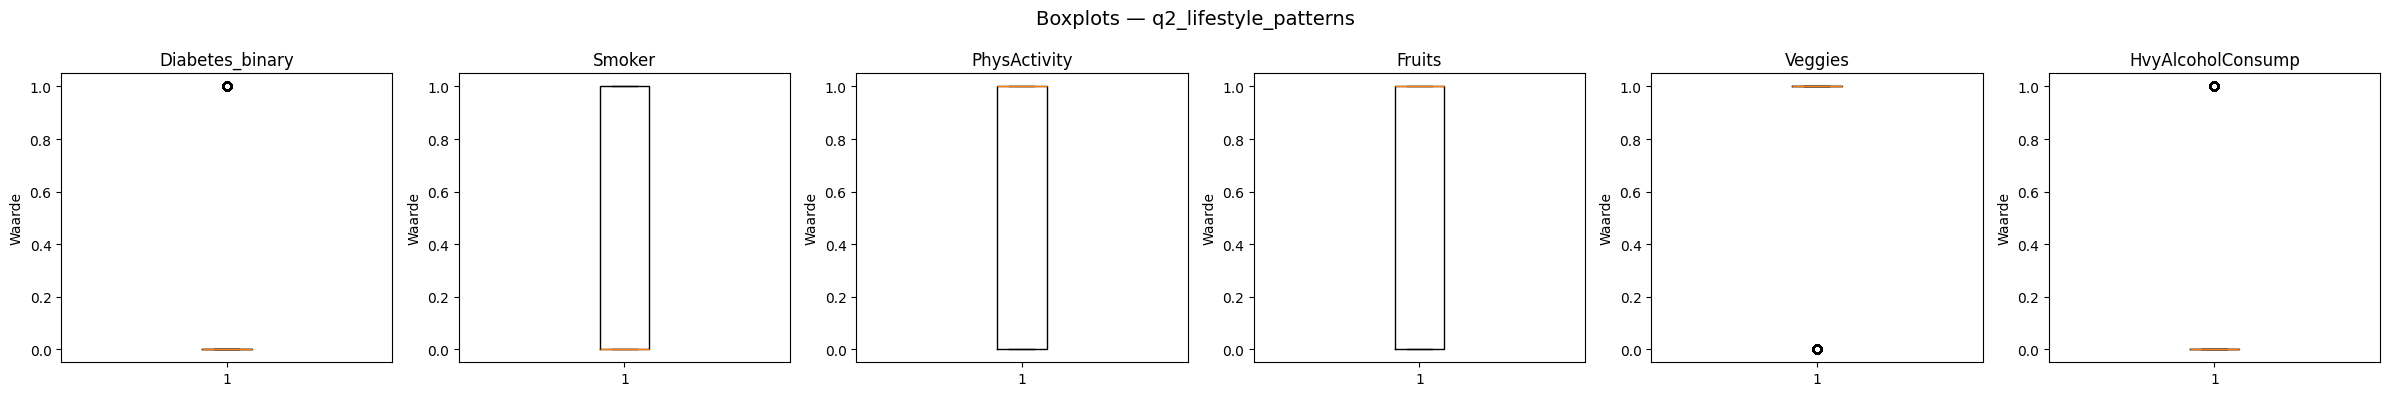

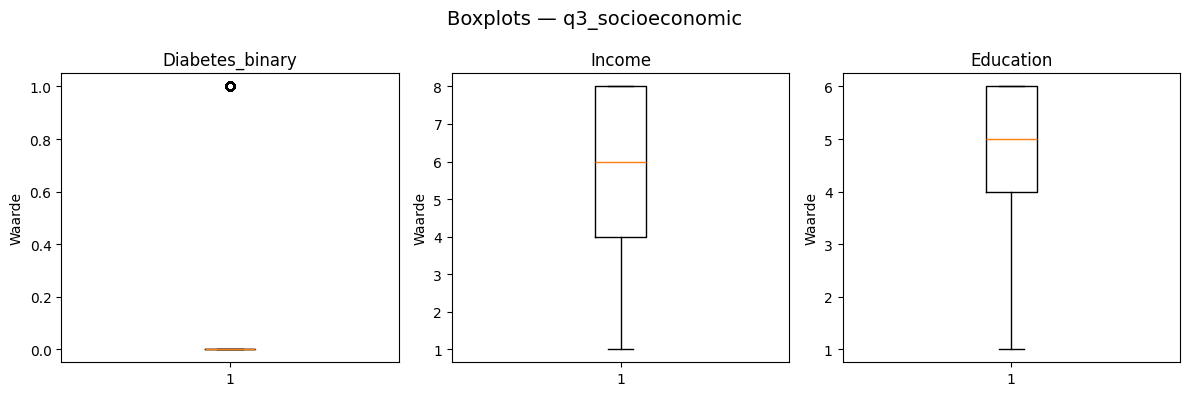

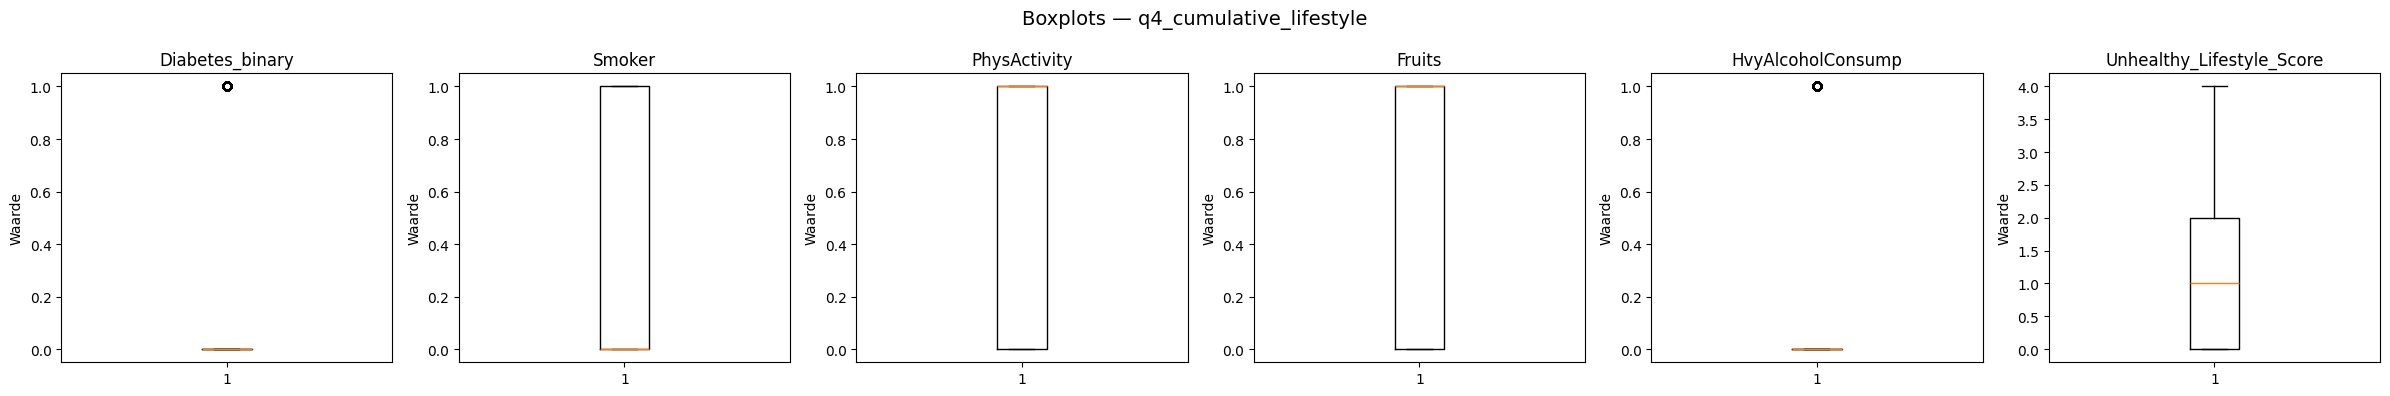

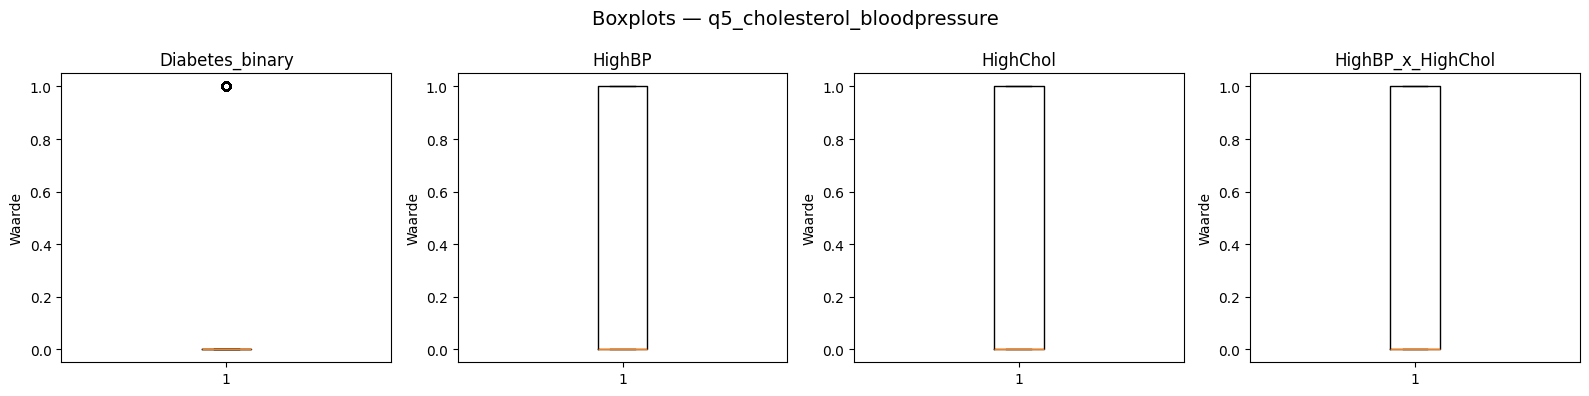

In [9]:
plot_boxplots(questions)

### Histogrammen per onderzoeksvraag

Histogrammen tonen de **frequentieverdeling** van elke variabele.
Bij binaire variabelen (0/1) zie je twee balken — de hoogte toont hoeveel respondenten in elke categorie vallen.
Bij ordinale variabelen (zoals Income, Education) zie je de verdeling over de categorien.

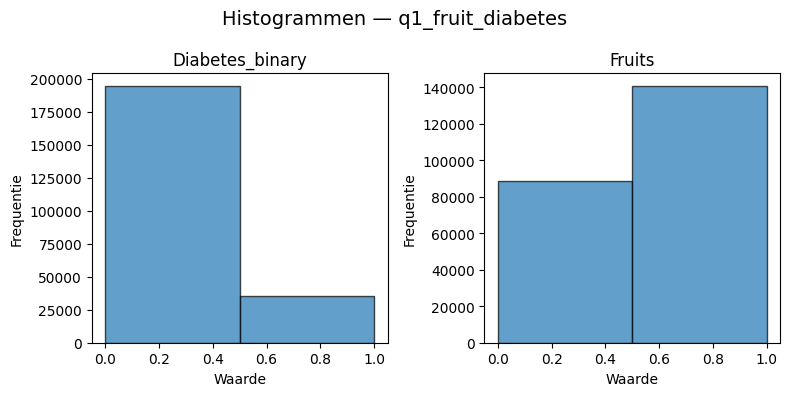

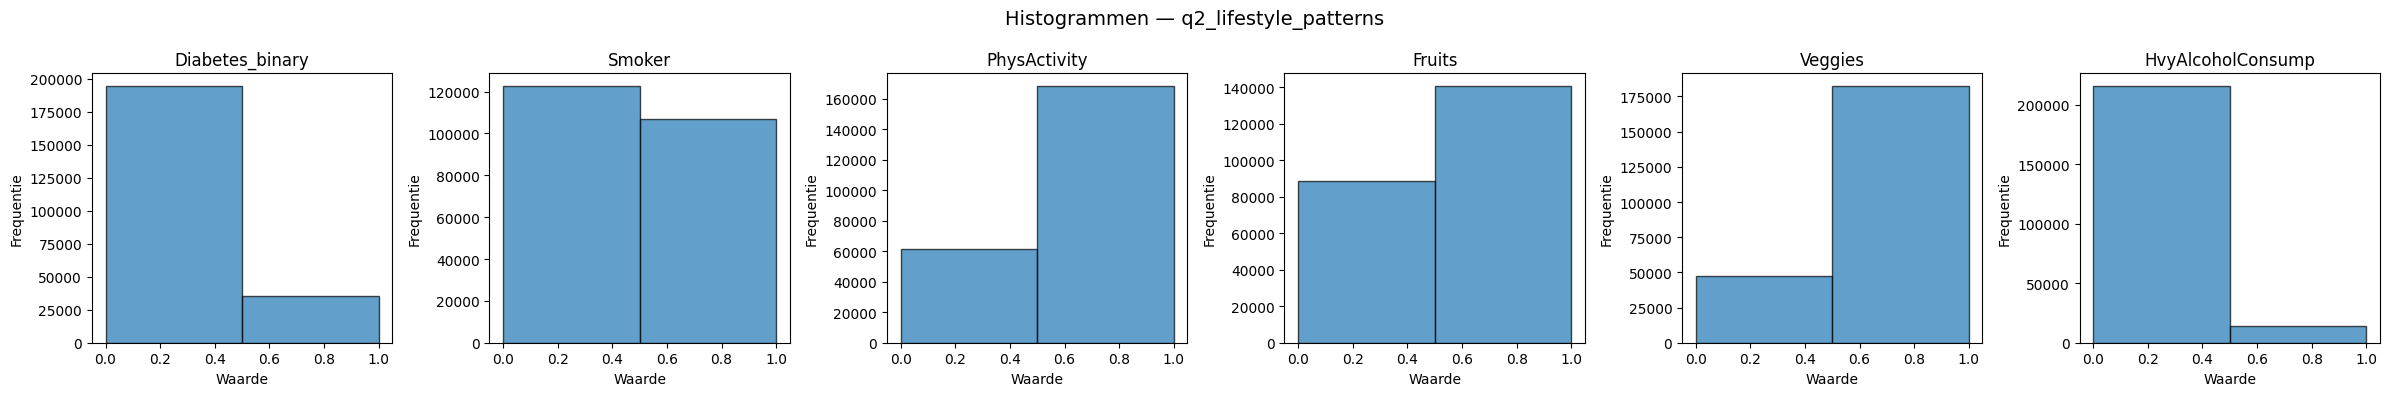

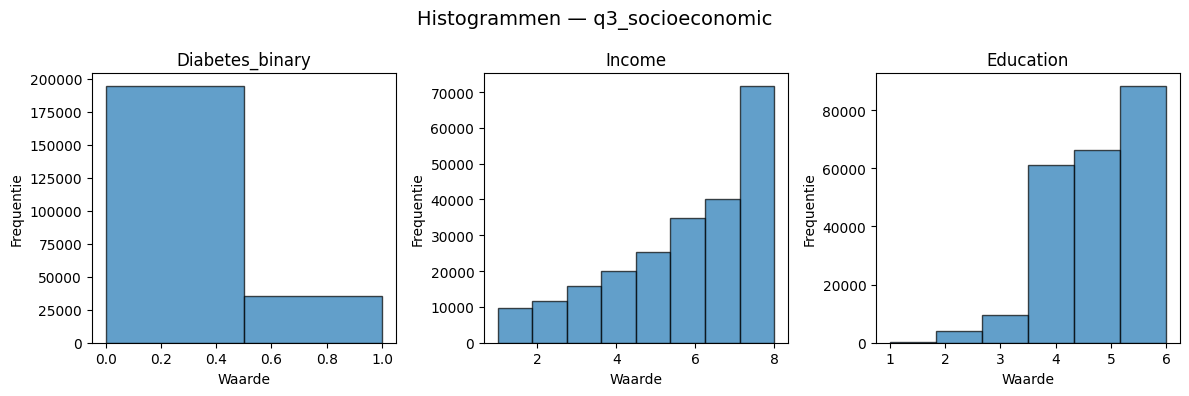

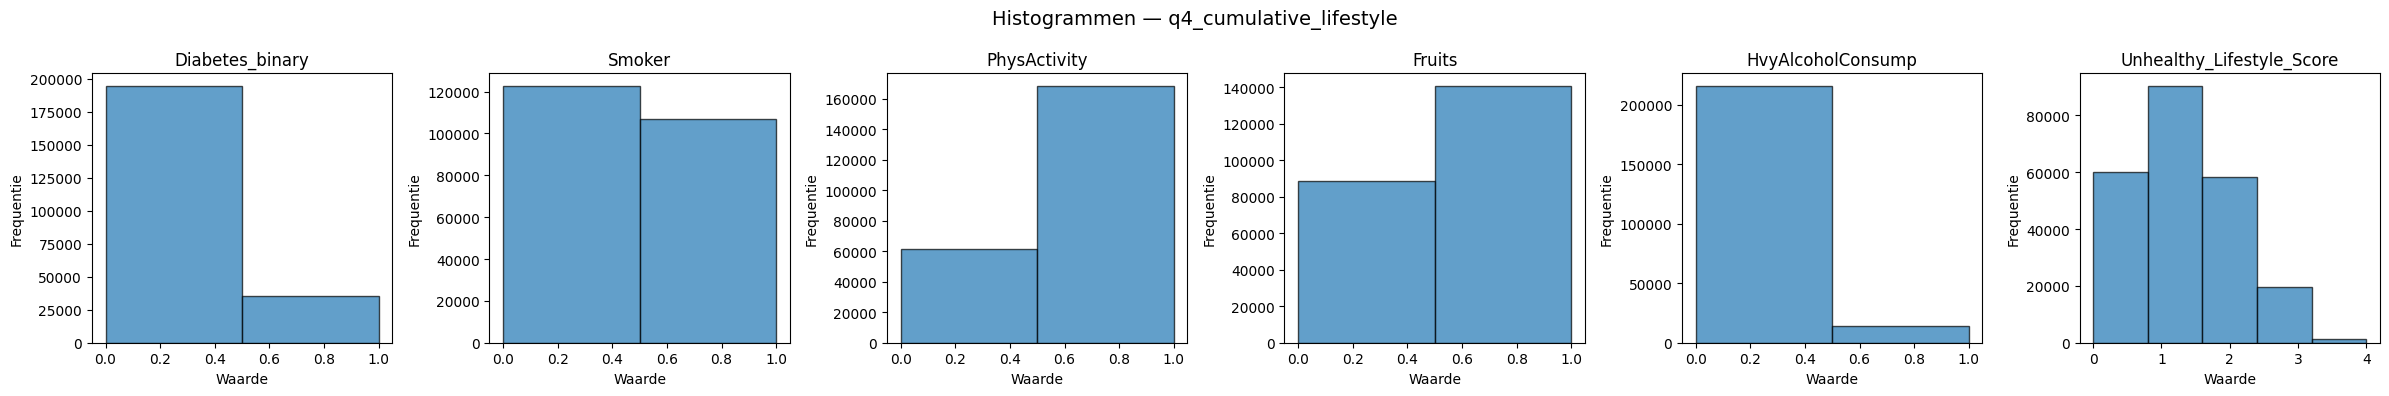

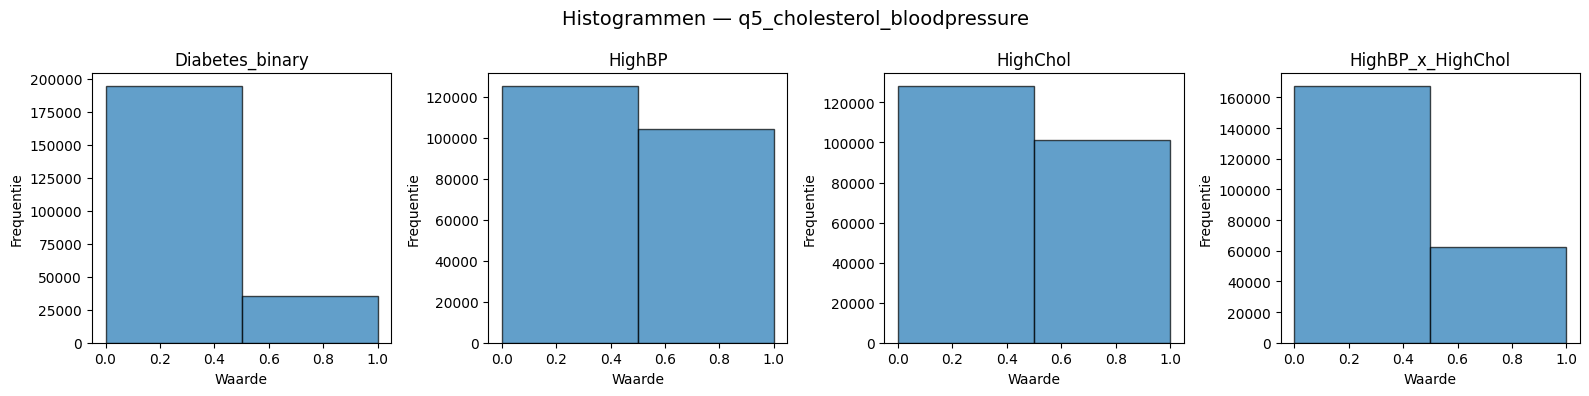

In [8]:
plot_histograms(questions)

---
## Stap 6: Grafieken per onderzoeksvraag

Niet elk grafiektype is geschikt voor elke situatie. Hieronder gebruiken we per vraag het meest passende type:

| Grafiektype | Wanneer gebruiken |
|-------------|-------------------|
| **Proportioneel staafdiagram** | Verhoudingen vergelijken tussen groepen (bijv. diabetes % bij wel/niet fruit) |
| **Horizontaal staafdiagram** | Meerdere factoren naast elkaar vergelijken op dezelfde metriek |
| **Lijndiagram** | Trends tonen over ordinale categorien (bijv. inkomen 1-8) |
| **Vlakdiagram** | Cumulatieve opbouw benadrukken (bijv. stijgend risico per score) |
| **Cirkeldiagram** | Verdeling van een enkele variabele tonen |
| **Scatter plot** | Relatie tussen twee numerieke variabelen tonen |
| **Bubbeldiagram** | Drie dimensies tegelijk tonen (x, y en grootte) |
| **2x2 Heatmap** | Interactie-effect tussen twee binaire variabelen visualiseren |
| **Correlatiematrix** | Samenhang tussen alle variabelen in een dataset |

In [ ]:
from data_procesing.data_presenting import plot_q1, plot_q2, plot_q3, plot_q4, plot_q5

### Q1: Fruit Consumptie & Diabetes
> "Heeft het regelmatig eten van fruit (>=1x per dag) invloed op de kans op diabetes?"

**Grafiekkeuze:**
- **Proportioneel staafdiagram** — vergelijkt de diabetes verhouding tussen fruiteters en niet-fruiteters.
  Dit is beter dan een gewoon staafdiagram omdat we niet het *aantal* willen vergelijken, maar het *percentage* diabetes binnen elke groep.
- **Cirkeldiagram** — toont hoeveel mensen wel/niet dagelijks fruit eten (verdeling van de onafhankelijke variabele).

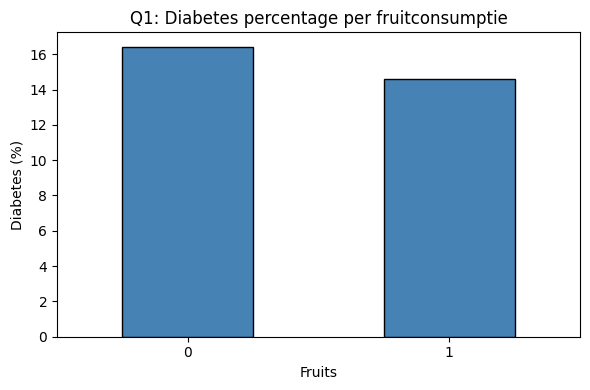

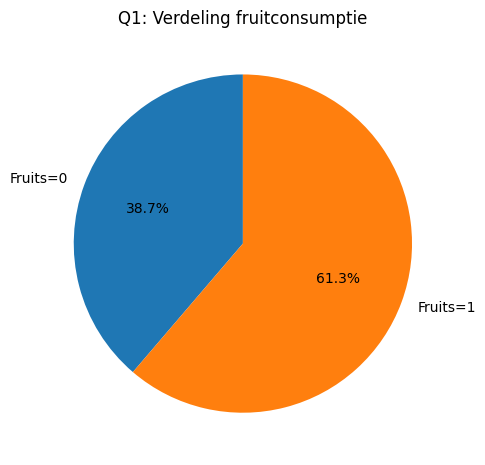

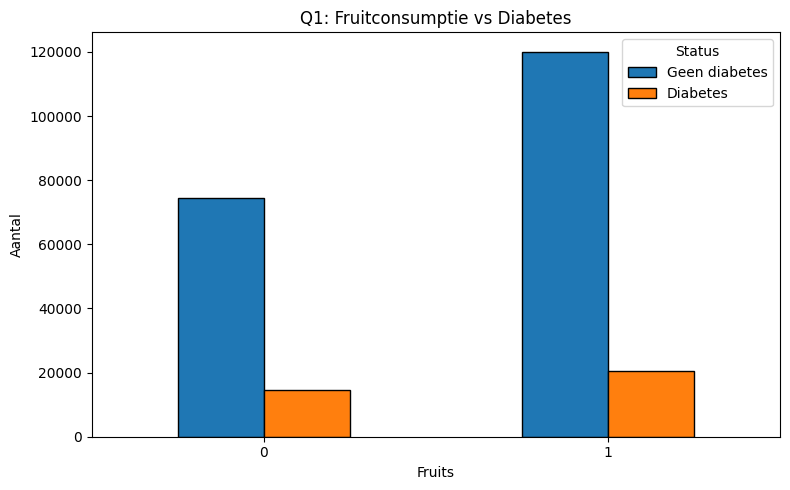

In [10]:
plot_q1(questions["q1_fruit_diabetes"])

**Interpretatie Q1:**
- Het proportioneel staafdiagram toont of er een verschil is in diabetes percentage tussen mensen die wel (>=1x/dag) en niet (<1x/dag) dagelijks fruit eten.
- Als het rode deel (diabetes) duidelijk kleiner is bij Fruits=1, dan suggereert dit een beschermend effect van fruitconsumptie.
- Het cirkeldiagram toont dat het merendeel van de respondenten aangeeft dagelijks fruit te eten, wat belangrijk is voor de betrouwbaarheid van de vergelijking.

### Q2: Lifestyle Patronen & Diabetes
> "Welke lifestyle patronen komen vaak samen voor bij mensen met diabetes?"

**Grafiekkeuze:**
- **Horizontaal staafdiagram** — vergelijkt het diabetes percentage over alle 5 lifestyle factoren in een grafiek.
  Dit is beter dan 5 losse staafdiagrammen omdat je de factoren direct kunt vergelijken.
  De stippellijn toont het gemiddelde diabetes percentage; factoren boven de lijn (rood) zijn risicofactoren.
- **Correlatiematrix (heatmap)** — toont de onderlinge samenhang tussen alle factoren, inclusief diabetes.

In [ ]:
plot_q2(questions["q2_lifestyle_patterns"])

**Interpretatie Q2:**
- Het horizontale staafdiagram laat zien welke lifestyle factoren het sterkst geassocieerd zijn met diabetes.
  Factoren die boven de gemiddelde stippellijn liggen (rood) komen vaker voor bij diabetespatienten.
- In de correlatiematrix duiden waarden dicht bij **+1** op een sterke positieve samenhang, en waarden dicht bij **-1** op een negatieve samenhang.
  Let op: correlatie betekent niet automatisch causaliteit — het toont alleen dat twee variabelen samen bewegen.

### Q3: Socio-economische Status & Diabetes
> "Heeft een lagere socio-economische status een negatief effect op de kans op diabetes?"

**Grafiekkeuze:**
- **Lijndiagrammen** — tonen de trend van diabetes percentage over inkomen (1-8) en opleiding (1-6).
  Dit is beter dan staafdiagrammen voor ordinale data, omdat de **volgorde** en de **trend** belangrijk zijn.
  Een dalende lijn betekent: hoe hoger het inkomen/de opleiding, hoe lager het diabetes percentage.
- **Scatter plot (x/y-diagram)** — toont de relatie tussen inkomen en opleiding, gekleurd op diabetes status.
- **Correlatiematrix** — kwantificeert de samenhang.

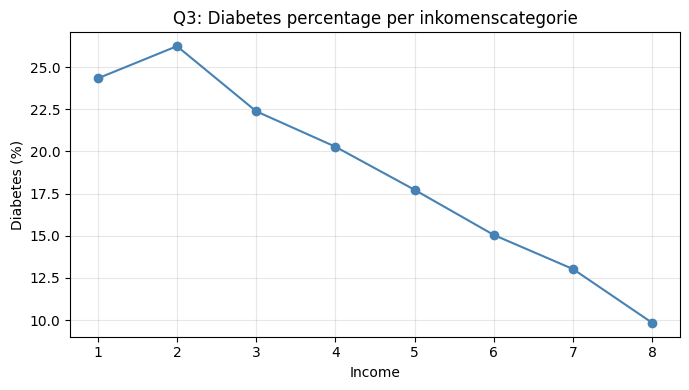

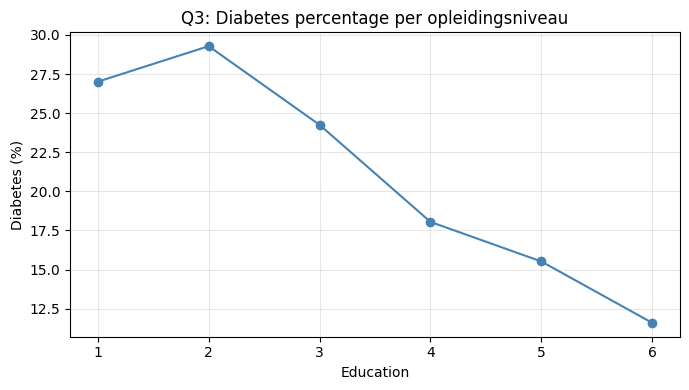

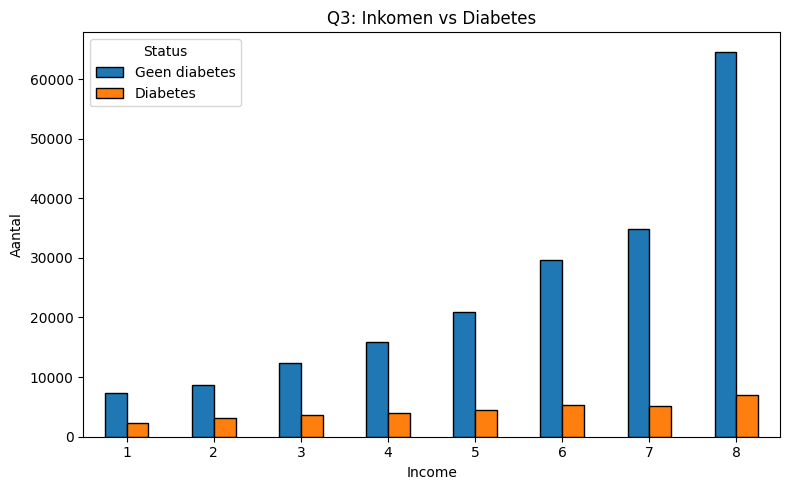

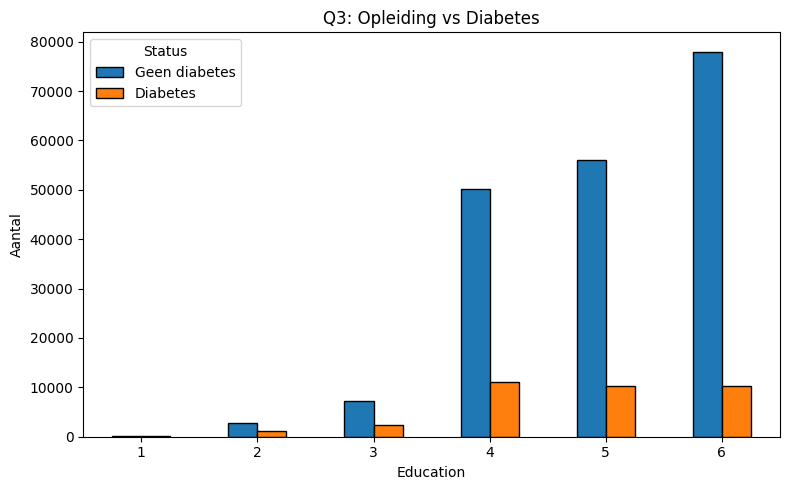

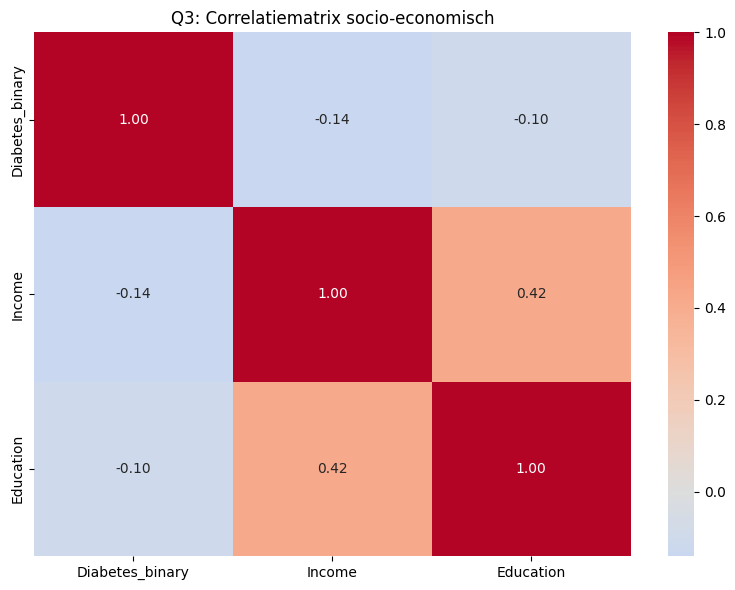

In [11]:
plot_q3(questions["q3_socioeconomic"])

**Interpretatie Q3:**
- De lijndiagrammen tonen of er een dalende trend is: hoe hoger het inkomen/de opleiding, hoe lager het diabetes percentage.
  Een steil dalende lijn wijst op een sterk beschermend effect van socio-economische status.
- De scatter plot toont of diabetespatienten (rode punten) zich concentreren in het gebied met lagere inkomens en lagere opleiding.
- De negatieve correlatie in de matrix bevestigt: hogere socio-economische status hangt samen met minder diabetes.

### Q4: Cumulatief Effect Lifestyle Factors
> "Hoe verandert het diabetes risico bij meerdere ongezonde lifestyle factors?"

**Grafiekkeuze:**
- **Vlakdiagram** — toont hoe het diabetes risico stijgt naarmate de Unhealthy Lifestyle Score toeneemt.
  Dit is beter dan een staafdiagram omdat het de **cumulatieve opbouw** benadrukt met het gevulde oppervlak.
  Als de curve steiler wordt bij hogere scores, dan is het effect synergistisch (niet-lineair).
- **Cirkeldiagram** — toont de verdeling van de score in de populatie (hoeveel mensen hebben score 0, 1, 2, etc.).
- **Bubbeldiagram** — combineert drie dimensies: de score (x-as), het diabetes percentage (y-as) en het aantal personen (grootte van de bubbel).

In [ ]:
plot_q4(questions["q4_cumulative_lifestyle"])

**Interpretatie Q4:**
- Het vlakdiagram toont of het diabetes risico **lineair** (gelijkmatig) of **exponentieel** (steeds sneller) stijgt met het aantal risicofactoren.
  Een steeds steiler wordende curve duidt op een synergistisch effect: de combinatie van factoren is erger dan de som.
- Het cirkeldiagram toont dat de meeste mensen een score van 1-2 hebben — extreme scores (0 of 4) zijn zeldzamer.
- In het bubbeldiagram toont de grootte van elke bubbel hoeveel personen in die groep zitten.
  Grotere bubbels betekenen betrouwbaardere schattingen van het diabetes percentage.

### Q5: Cholesterol + Bloeddruk & Diabetes
> "Verhoogt de combinatie van hoog cholesterol en hoge bloeddruk het diabetes risico synergistisch?"

**Grafiekkeuze:**
- **2x2 Heatmap** — toont het diabetes percentage per combinatie van HighBP en HighChol.
  Dit is beter dan staafdiagrammen omdat de **2x2 structuur** het interactie-effect direct zichtbaar maakt.
  Als de rechtsonder-cel (beide condities aanwezig) disproportioneel hoog is, dan is er een synergistisch effect.
- **Proportioneel staafdiagram** — toont de diabetes verhouding per combinatiegroep.
- **Correlatiematrix** — toont de samenhang inclusief de interactieterm.

In [ ]:
plot_q5(questions["q5_cholesterol_bloodpressure"])

**Interpretatie Q5:**
- De 2x2 heatmap maakt het interactie-effect direct zichtbaar:
  - **Linksboven** (geen BP, geen Chol): laagste diabetes percentage (referentiegroep)
  - **Rechtsboven/Linksonder** (een van beide condities): verhoogd percentage
  - **Rechtsonder** (beide condities): als dit getal **meer** is dan de som van de individuele effecten, dan is er sprake van synergie
- Het proportioneel staafdiagram bevestigt dit patroon in een andere weergave.
- De correlatiematrix toont dat HighBP en HighChol zelf ook positief gecorreleerd zijn — ze komen dus vaker samen voor.